#### Hurricane trends

1. Load best tracks North Atlantic dataset

2. Plot a storm trajectory

3. Calculate storm frequency and calculate trend



## Hurricanes

### 1. Load the csv files into a pandas dataframe, select a hurricane and plot it's trajectory
We'll be using a widely used dataset for global hurricanes, we'll be looking at the North Atlantic.
Download 'ibtracs.NA.list.v04r00.csv' from:
https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/
Read (glance briefly at) the documentation:
https://www.ncdc.noaa.gov/ibtracs/pdf/IBTrACS_v04_column_documentation.pdf

Hint: Have a look at the column names and see if you can drop some columns you don't need. Ideally you want hurricane name, year, lat and lon. You could also have a look at category too.

Hint: You'll want to use df.loc to select a hurricane on your choice! And remember, some hurricane names have been used more than once over the years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/ibtracs.NA.list.v04r00.csv',dtype=object)
# added this dtype as otherwise it was showing an error for mixed dtype
df = df.iloc[1:,:]
df.shape
df.head(3)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290


In [4]:
df.describe()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
count,122369,122369,122369,542,29260,122369,122369,122369,122369,122369,...,122369,122369,122369,122369,122369,122369,122369,122369,122369,122369
unique,2266,170,137,2,4,294,89296,6,39834,51525,...,1,1,1,2,178,173,160,170,81,362
top,1899215N12329,1887,43,EP,CS,NOT_NAMED,2020-09-17 03:00:00,TS,14.0000,-73.5000,...,,,,,,,,,10,270
freq,264,1907,2172,524,15279,72416,7,104029,363,214,...,122369,122369,122369,116073,116309,116915,117753,117079,8958,3128


In [5]:
# Get the storm ID and the year
sid = df.loc[:,'SID']
season = df.loc[:,'SEASON']
# put it together in one string
sid_season = sid + season
# get the unique values from that 
uniques = sid_season.unique()
# then get the last four characters from that, in order to get the year
uniques = pd.DataFrame(uniques,dtype=str)
ylist = uniques[0].str[-4:]
ylist = np.array(ylist,dtype=int)

Text(0.5, 1.0, 'Count of storms by year')

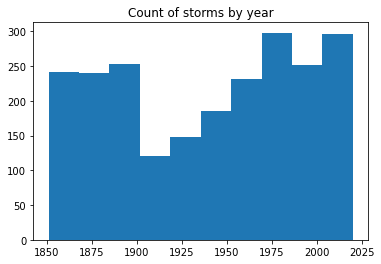

In [6]:
import matplotlib.pyplot as plt
# create plot
fig = plt.figure()
# add figure
ax = fig.add_subplot(111)
ax.hist(ylist)
ax.set_title('Count of storms by year')

In [7]:
# Useful things to look at: max wind speed
# col - USA_WIND

In [74]:
# after 1900
s = np.array(df['SEASON'],dtype=int)
w = np.array(df['USA_WIND']) # problem in that lots of old data doesn't have windspeed
wn = w[ w != ' '] # using Boolean to only get the values where there is data
s = s[ w != ' ']

In [75]:
print(wn.shape)
print(s.shape)

(101858,)
(101858,)


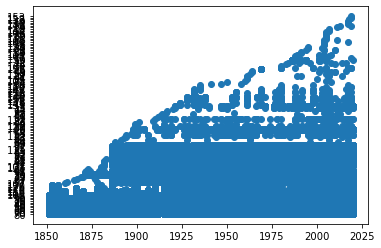

In [76]:
# lots of values, maybe there are multiple recordings for each storm
# this data set has 100K observations, but unique for numbers of storms is 2K
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(s,wn)

In [ ]:
# for loop to average the USA wind speed for each 


In [9]:
# How has average wind speed changed over time?
# Things to plot are year and USA_WIND

## Calculate hurricane frequency
Hint: You want a list of the number of storms which occured each year
Hint: What information is in your dataset? Will you need to remove some rows?

### 3. Investigate the storm frequency trend

Is there a trend? Why might it be contested? Try plotting different time periods and having a look at what changes.

In [10]:
# Subset of the array since 1900, using Boolean
year = df.loc[:,'SEASON']
year = np.array(year,dtype=int)
print(year.shape)
print(year > 1900)
print(df[year>1900].shape)

(122369,)
[False False False ...  True  True  True]
(84037, 163)


In [11]:
df.loc[:,'LON'] # for pandas, uses square brackets to get a particular value

1         -90.4000
2         -90.6999
3         -91.0000
4         -91.3001
5         -91.6000
            ...   
122365    -87.1500
122366    -87.3363
122367    -87.5000
122368    -87.6898
122369    -87.9000
Name: LON, Length: 122369, dtype: object